<a href="https://colab.research.google.com/github/Arnav1511/OMSA/blob/main/MajorProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing drive library and mounting gdrive

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")


Mounted at /content/gdrive


Mounting the dataset

In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR']='/content/gdrive/MyDrive/kaggle_dataset'

In [ ]:
%cd /content/gdrive/MyDrive/kaggle_dataset

/content/gdrive/MyDrive/kaggle_dataset


Listing all the contents

In [ ]:
!ls


'Bigtech - 12-07-2020 till 19-09-2020'
'Bigtech - 20-09-2020 till 13-10-2020.csv'
 big-tech-companies-tweet-sentiment.zip
 kaggle.json


In [ ]:
!pwd


/content/gdrive/MyDrive/kaggle_dataset


Downloading dataset from Kaggle

In [ ]:
!kaggle datasets download -d wjia26/big-tech-companies-tweet-sentiment

big-tech-companies-tweet-sentiment.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!ls

'Bigtech - 12-07-2020 till 19-09-2020'
'Bigtech - 20-09-2020 till 13-10-2020.csv'
 big-tech-companies-tweet-sentiment.zip
 kaggle.json


Unzipping the dataset

In [ ]:
!unzip /content/gdrive/MyDrive/kaggle_dataset/big-tech-companies-tweet-sentiment.zip

Archive:  /content/gdrive/MyDrive/kaggle_dataset/big-tech-companies-tweet-sentiment.zip
replace Bigtech - 12-07-2020 till 19-09-2020/Bigtech - 12-07-2020 till 19-09-2020.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
!ls


'Bigtech - 12-07-2020 till 19-09-2020'
'Bigtech - 20-09-2020 till 13-10-2020.csv'
 big-tech-companies-tweet-sentiment.zip
 kaggle.json


Creating dataframe from the dataset

In [ ]:
import pandas as pd
df=pd.read_csv("Bigtech - 20-09-2020 till 13-10-2020.csv")


In [ ]:
df.shape

(266095, 15)

In [ ]:
df.columns

Index(['created_at', 'file_name', 'followers', 'friends', 'group_name',
       'location', 'retweet_count', 'screenname', 'search_query', 'text',
       'twitter_id', 'username', 'polarity', 'partition_0', 'partition_1'],
      dtype='object')

Extract the reviews

In [ ]:
tweet=df.text.values
print(tweet)

['NVIDIA GauGAN is actually a good tool to practice composition/framing? '
 'BullSequana X2415, the first supercomputer blade server in Europe to integrate NVIDIA’s Ampere next-generation graphics processing unit architecture, the NVIDIA A100 Tensor Core GPU s.  Read more ▶  Atos is sponsor at Nvidia GTC20 Digital '
 "I'm going to attend GTC 2020 tonight! Excited. Nvidia GTC20" ...
 'New vlog arrivals! Discover a lovely culture treasuring family in HongKong. Wanna share the moments, a Mid Autumn Festival week of mine. Touch HK! YouTube AsianView SubscribeNow  '
 'New Video is up. Finally showing my new Streaming PC build. A much needed upgrade to help maximise my content creation. Sorry guys, no RTX3080in this one.    RTX NZXT rogstrix Corsair pcbuild youtube streamer streamingpc PC twitch'
 'NEW VIDEO!!   FRIEND v FRIEND CHALLENGE!!      friendvfriend friends challenge challenger youtube YouTuber twitch TwitchStreamers']


Tokenizing and removing stopwords

In [ ]:
import nltk 
from nltk.tokenize import RegexpTokenizer #to remove punctuations and tokenize the text
from nltk.corpus import stopwords # to remove the stop words after tokenization
nltk.download('stopwords')
nltk.download('punkt')

#tokens_without_sw = [word for word in tweet if not word in stopwords.words()]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

Cleaning the Text (emojis, mentions, hashtags, hyperlinks)

In [ ]:
import re

emojis = re.compile("["
    u"\U0001F600-\U0001F64F"  # emoticons
    u"\U0001F300-\U0001F5FF"  # symbols & pictographs
    u"\U0001F680-\U0001F6FF"  # transport & map symbols
    u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                        "]+", flags=re.UNICODE)

def cleanTxt(text):
  text = re.sub(r'@[A-Za-z0-9]+','',text) #Removed @mentions
  text = re.sub(r'#','',text) #Removing the #symbol
  text = re.sub(r'RT[\s]+','',text)  #Removing the RT
  text = re.sub(r'https?:\/\/\S+','',text) #Removing the hyperlinks
  text = emojis.sub(r'',text) #remove emojis

  return text


#Cleaning the text
df['text']=df['text'].apply(cleanTxt)

#Show the cleaned text
df.head(12)


,created_at,file_name,followers,friends,group_name,location,retweet_count,screenname,search_query,text,twitter_id,username,polarity,partition_0,partition_1,Subjectivity,NewPolarity,Analysis
0,2020-10-05 08:44:25,Nvidia,41,410,Nvidia,sydney,0,jyolyu,#Nvidia,NVIDIA GauGAN is actually a good tool to pract...,1313037313635565568,N0%Ice,0.4404,Technology,Nvidia,0.600000,0.700000,Positive
1,2020-10-05 08:44:03,Nvidia,367,267,Nvidia,PARIS,0,MiClaverie,#Nvidia,"BullSequana X2415, the first supercomputer bla...",1313037222422118400,Michèle Claverie,0.0000,Technology,Nvidia,0.277778,0.250000,Positive
2,2020-10-05 08:41:35,Nvidia,14,104,Nvidia,Japan,0,_stingraze,#Nvidia,I'm going to attend GTC 2020 tonight! Excited....,1313036602675916802,Tsubasa Kato,0.4003,Technology,Nvidia,0.750000,0.375000,Positive
3,2020-10-05 08:28:11,Nvidia,18286,941,Nvidia,NaN,0,gamingonlinux,#Nvidia,NVIDIA delays launch of GeForce RTX 3070 until...,1313033229201477634,GamingOnLinux 🐧,0.0000,Technology,Nvidia,0.000000,0.000000,Neutral
4,2020-10-05 08:18:05,Nvidia,42,84,Nvidia,"Paris, France",0,anupdshetty,#Nvidia,"BullSequana X2415, the first supercomputer bla...",1313030688338317312,Anup Shetty,0.0000,Technology,Nvidia,0.277778,0.250000,Positive
5,2020-10-05 08:15:05,Nvidia,16,39,Nvidia,"Nürnberg, Bayern",0,mdepenbr,#Nvidia,"BullSequana X2415, the first supercomputer bla...",1313029932059185153,Martin Depenbrock,0.0000,Technology,Nvidia,0.277778,0.250000,Positive
6,2020-10-05 08:13:47,Nvidia,26163,19140,Nvidia,"Grenoble, France",4,SBUCloud,#Nvidia,"Today, don’t miss the World’s largest AI confe...",1313029604593065985,Stephane Bureau,-0.1531,Technology,Nvidia,0.000000,0.000000,Neutral
7,2020-10-05 08:12:10,Nvidia,206,86,Nvidia,"Madrid, Spain",0,LauraMartin_sp,#Nvidia,"BullSequana X2415, the first supercomputer bla...",1313029200333492224,Laura Martín Sánchez,0.0000,Technology,Nvidia,0.277778,0.250000,Positive
8,2020-10-05 08:09:05,Nvidia,75,47,Nvidia,"Ile-de-France, France",0,FabienLocussol,#Nvidia,"BullSequana X2415, the first supercomputer bla...",1313028423179268096,Fabien Locussol,0.0000,Technology,Nvidia,0.277778,0.250000,Positive
9,2020-10-05 08:02:51,Nvidia,663,1611,Nvidia,Germany,1,beleept,#Nvidia,NVIDIA GeForce RTX 30 Series – Top Facts &amp;...,1313026852752162817,BELEEPT,0.2023,Technology,Nvidia,0.633333,0.033333,Positive


In [ ]:
df=df.drop_duplicates(subset='text')

In [ ]:
df.head(20)

,created_at,file_name,followers,friends,group_name,location,retweet_count,screenname,search_query,text,twitter_id,username,polarity,partition_0,partition_1,Subjectivity,NewPolarity,Analysis
0,2020-10-05 08:44:25,Nvidia,41,410,Nvidia,sydney,0,jyolyu,#Nvidia,NVIDIA GauGAN is actually a good tool to pract...,1313037313635565568,N0%Ice,0.4404,Technology,Nvidia,0.600000,0.700000,Positive
1,2020-10-05 08:44:03,Nvidia,367,267,Nvidia,PARIS,0,MiClaverie,#Nvidia,"BullSequana X2415, the first supercomputer bla...",1313037222422118400,Michèle Claverie,0.0000,Technology,Nvidia,0.277778,0.250000,Positive
2,2020-10-05 08:41:35,Nvidia,14,104,Nvidia,Japan,0,_stingraze,#Nvidia,I'm going to attend GTC 2020 tonight! Excited....,1313036602675916802,Tsubasa Kato,0.4003,Technology,Nvidia,0.750000,0.375000,Positive
3,2020-10-05 08:28:11,Nvidia,18286,941,Nvidia,NaN,0,gamingonlinux,#Nvidia,NVIDIA delays launch of GeForce RTX 3070 until...,1313033229201477634,GamingOnLinux 🐧,0.0000,Technology,Nvidia,0.000000,0.000000,Neutral
6,2020-10-05 08:13:47,Nvidia,26163,19140,Nvidia,"Grenoble, France",4,SBUCloud,#Nvidia,"Today, don’t miss the World’s largest AI confe...",1313029604593065985,Stephane Bureau,-0.1531,Technology,Nvidia,0.000000,0.000000,Neutral
9,2020-10-05 08:02:51,Nvidia,663,1611,Nvidia,Germany,1,beleept,#Nvidia,NVIDIA GeForce RTX 30 Series – Top Facts &amp;...,1313026852752162817,BELEEPT,0.2023,Technology,Nvidia,0.633333,0.033333,Positive
10,2020-10-05 08:02:05,Nvidia,853,866,Nvidia,England.,0,Jameswalters83,#Nvidia,In a bizarre twist to this already highly co...,1313026660665524229,James Walters | Google Stadia Pro.,-0.6115,Technology,Nvidia,0.550649,0.090909,Positive
11,2020-10-05 07:56:31,Nvidia,305,383,Nvidia,Germany,4,screenknight_vp,#Nvidia,PhotoModeMonday MAN'S ROAD ☁️ TheWitche...,1313025260254625792,👻 Scream 🎃 Night 👻,0.0000,Technology,Nvidia,0.000000,0.000000,Neutral
12,2020-10-05 07:48:19,Nvidia,1,21,Nvidia,NaN,0,VividSpx,#Nvidia,Hardware Utilization of VividSparks Products. ...,1313023194731696128,VividSparks,0.0000,Technology,Nvidia,0.000000,0.000000,Neutral
13,2020-10-05 07:30:15,Nvidia,24,42,Nvidia,Malaysia,0,OasisPinnacle,#Nvidia,Some news: The nvidia RTX 3070 has been delaye...,1313018650438389760,Oasis@Pinnacle Coworking Space,0.1027,Technology,Nvidia,0.625000,0.437500,Positive


Vectorizing the reviews

In [ ]:
from textblob import TextBlob

def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
    return TextBlob(text).sentiment.polarity

#def getFilteredText(text):
#    text= cleanText(text);
#    return text

df['Subjectivity']=df['text'].apply(getSubjectivity)
df['NewPolarity']=df['text'].apply(getPolarity)
#df['CleanedText']=df['text'].apply(getFilteredText)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Generating the wordcloud after text filtering

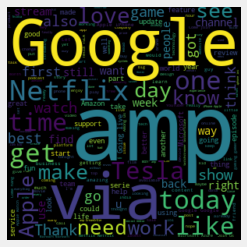

In [ ]:
#Plot a word cloud 
from wordcloud import WordCloud
import tweepy
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

restricted=['YOUTUBE','SUBSCRIBE','CHECK','twitch','New', 'video','Follow','Comment']+stopwords.words('english')

allWords = ' '.join( [twts for twts in df['text']])
wordCloud = WordCloud( width = 300, height= 300, random_state = 21, max_font_size = 119, stopwords=restricted).generate(allWords)

plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

Generating the analysis (Negative, Positive, Neutral)

In [ ]:
#Create a function to compute positive, negative or neutral text

def getAnalysis(score):
 if score < 0:
  return 'Negative'
 elif score == 0:
  return 'Neutral'
 else:
  return 'Positive'

df['Analysis']= df['NewPolarity'].apply(getAnalysis)


In [ ]:
df[['file_name', 'text', 'Subjectivity', 'NewPolarity','Analysis']].head(50)


,file_name,text,Subjectivity,NewPolarity,Analysis
0,Nvidia,NVIDIA GauGAN is actually a good tool to pract...,0.600000,0.700000,Positive
1,Nvidia,"BullSequana X2415, the first supercomputer bla...",0.277778,0.250000,Positive
2,Nvidia,I'm going to attend GTC 2020 tonight! Excited....,0.750000,0.375000,Positive
3,Nvidia,NVIDIA delays launch of GeForce RTX 3070 until...,0.000000,0.000000,Neutral
4,Nvidia,"BullSequana X2415, the first supercomputer bla...",0.277778,0.250000,Positive
5,Nvidia,"BullSequana X2415, the first supercomputer bla...",0.277778,0.250000,Positive
6,Nvidia,"Today, don’t miss the World’s largest AI confe...",0.000000,0.000000,Neutral
7,Nvidia,"BullSequana X2415, the first supercomputer bla...",0.277778,0.250000,Positive
8,Nvidia,"BullSequana X2415, the first supercomputer bla...",0.277778,0.250000,Positive
9,Nvidia,NVIDIA GeForce RTX 30 Series – Top Facts &amp;...,0.633333,0.033333,Positive


Plotting the Subjectivity vs Polarity graph for first 1500 reviews

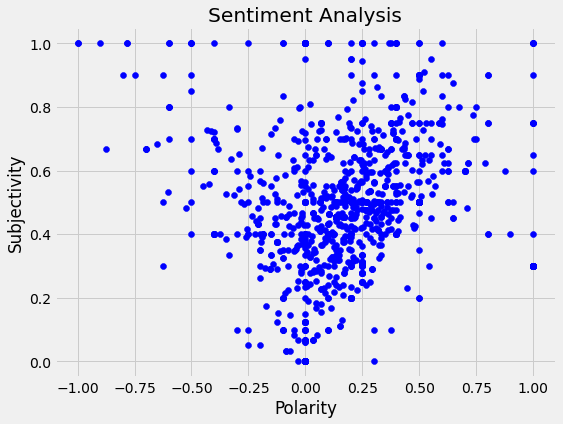

In [ ]:
#plot the polarity and subjectivity
plt.figure(figsize=(8,6))
for i in range(0, 1500):
  plt.scatter(df['NewPolarity'][i], df['Subjectivity'][i], color='Blue')

  plt.title('Sentiment Analysis')
  plt.xlabel('Polarity')
  plt.ylabel('Subjectivity')
plt.show()

In [ ]:
df.shape[0]

266095

Plotting the Subjectivity vs Polarity graph for Nvidia throughout the dataframe

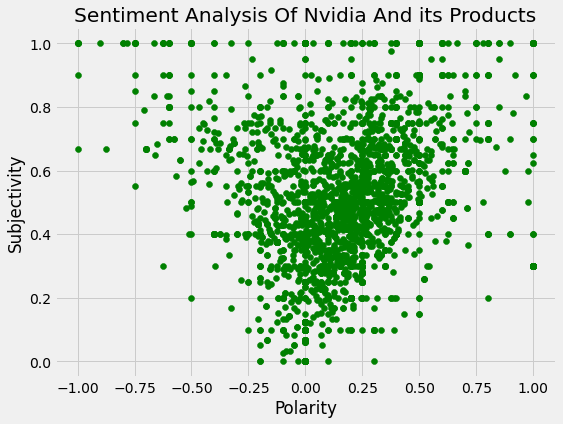

In [ ]:
#plot the polarity and subjectivity
plt.figure(figsize=(8,6))
for i in range(0, df.shape[0]):
  if (df['file_name'][i]=='Nvidia'):
        plt.scatter(df['NewPolarity'][i], df['Subjectivity'][i], color='Green')

  plt.title('Sentiment Analysis Of Nvidia And its Products')
  plt.xlabel('Polarity')
  plt.ylabel('Subjectivity')
plt.show()

Plotting the Subjectivity vs Polarity graph for Twitch throughout the dataframe

In [ ]:
#Get the percentage of Positive tweets
ptweets = df[df.Analysis == 'Positive']
ptweets = ptweets['text']

round(  (ptweets.shape[0] / df.shape[0]) *100, 1)

51.5

In [ ]:
nvidia = ptweets[df.file_name=='Nvidia']
ms = ptweets[df.file_name=='Microsoft']
amd = ptweets[df.file_name=='AMD']
amazon = ptweets[df.file_name=='Amazon']
twitch = ptweets[df.file_name=='Twitch']
apple = ptweets[df.file_name=='Apple']
youtube = ptweets[df.file_name=='Youtube']
tesla = ptweets[df.file_name=='Tesla']
google = ptweets[df.file_name=='Google']
netflix = ptweets[df.file_name=='Netflix']



print("Positive reviews regarding Nvidia and its products: "+str(round(  (nvidia.shape[0] / ptweets.shape[0]) *100,1))+"%")
print("Positive reviews regarding Microsoft and its products: "+str(round(  (ms.shape[0] / ptweets.shape[0]) *100, 1))+"%")
print("Positive reviews regarding AMD and its products: "+str(round(  (amd.shape[0] / ptweets.shape[0]) *100, 1))+"%")
print("Positive reviews regarding Amazon and its products: "+str(round(  (amazon.shape[0] / ptweets.shape[0]) *100, 1))+"%")
print("Positive reviews regarding Twitch and its products: "+str(round(  (twitch.shape[0] / ptweets.shape[0]) *100, 1))+"%")
print("Positive reviews regarding Apple and its products: "+str(round(  (apple.shape[0] / ptweets.shape[0]) *100, 1))+"%")
print("Positive reviews regarding Youtube and its products: "+str(round(  (youtube.shape[0] / ptweets.shape[0]) *100, 1))+"%")
print("Positive reviews regarding Tesla and its products: "+str(round(  (tesla.shape[0] / ptweets.shape[0]) *100, 1))+"%")
print("Positive reviews regarding Google and its products: "+str(round(  (google.shape[0] / ptweets.shape[0]) *100, 1))+"%")
print("Positive reviews regarding Netflix and its products: "+str(round(  (netflix.shape[0] / ptweets.shape[0]) *100, 1))+"%")


Positive reviews regarding Nvidia and its products: 1.4%
Positive reviews regarding Microsoft and its products: 9.3%
Positive reviews regarding AMD and its products: 1.3%
Positive reviews regarding Amazon and its products: 10.1%
Positive reviews regarding Twitch and its products: 17.4%
Positive reviews regarding Apple and its products: 14.4%
Positive reviews regarding Youtube and its products: 14.0%
Positive reviews regarding Tesla and its products: 6.4%
Positive reviews regarding Google and its products: 11.7%
Positive reviews regarding Netflix and its products: 13.9%


In [ ]:
#Get the percentage of Negative tweets
ntweets=df[df.Analysis == 'Negative']
ntweets = ntweets['text']
round(  (ntweets.shape[0] / df.shape[0]) *100, 1)

12.5

In [ ]:
nvidiant = ntweets[df.file_name=='Nvidia']
msnt = ntweets[df.file_name=='Microsoft']
amdnt = ntweets[df.file_name=='AMD']
amazonnt = ntweets[df.file_name=='Amazon']
twitchnt = ntweets[df.file_name=='Twitch']
applent = ntweets[df.file_name=='Apple']
youtubent = ntweets[df.file_name=='Youtube']
teslant = ntweets[df.file_name=='Tesla']
googlent = ntweets[df.file_name=='Google']
netflixnt = ntweets[df.file_name=='Netflix']

print("Negative reviews regarding Nvidia and its products: "+str(round(  (nvidiant.shape[0] / ntweets.shape[0]) *100, 1))+"%")
print("Negative reviews regarding Microsoft and its products: "+str(round(  (msnt.shape[0] / ntweets.shape[0]) *100, 1))+"%")
print("Negative reviews regarding AMD and its products: "+str(round(  (amdnt.shape[0] / ntweets.shape[0]) *100, 1))+"%")
print("Negative reviews regarding Amazon and its products: "+str(round(  (amazonnt.shape[0] / ntweets.shape[0]) *100, 1))+"%")
print("Negative reviews regarding Twitch and its products: "+str(round(  (twitchnt.shape[0] / ntweets.shape[0]) *100, 1))+"%")
print("Negative reviews regarding Apple and its products: "+str(round(  (applent.shape[0] / ntweets.shape[0]) *100, 1))+"%")
print("Negative reviews regarding Youtube and its products: "+str(round(  (youtubent.shape[0] / ntweets.shape[0]) *100, 1))+"%")
print("Negative reviews regarding Tesla and its products: "+str(round(  (teslant.shape[0] / ntweets.shape[0]) *100, 1))+"%")
print("Negative reviews regarding Google and its products: "+str(round(  (googlent.shape[0] / ntweets.shape[0]) *100, 1))+"%")
print("Negative reviews regarding Netflix and its products: "+str(round(  (netflixnt.shape[0] / ntweets.shape[0]) *100, 1))+"%")


Negative reviews regarding Nvidia and its products: 1.8%
Negative reviews regarding Microsoft and its products: 9.5%
Negative reviews regarding AMD and its products: 1.0%
Negative reviews regarding Amazon and its products: 7.5%
Negative reviews regarding Twitch and its products: 17.2%
Negative reviews regarding Apple and its products: 14.7%
Negative reviews regarding Youtube and its products: 13.1%
Negative reviews regarding Tesla and its products: 7.6%
Negative reviews regarding Google and its products: 10.7%
Negative reviews regarding Netflix and its products: 16.9%


In [ ]:
#Get the percentage of Neutral tweets
netweets=df[df.Analysis == 'Neutral']
netweets = netweets['text']
round(  (netweets.shape[0] / df.shape[0]) *100, 1)

36.0

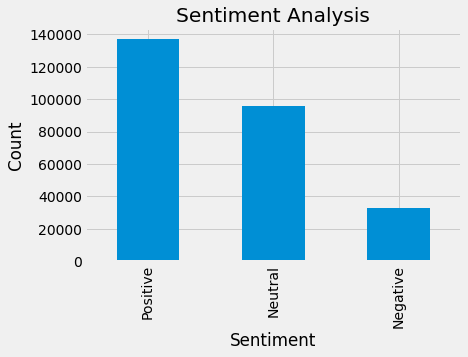

In [ ]:
#Show the value counts

df['Analysis'].value_counts()

#plot and visualize the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Count')
df['Analysis'].value_counts().plot(kind='bar')
#amd.value_counts().plot(kind='bar')


plt.show()


In [ ]:
#positive reviews variables
p_nvidia=round((nvidia.shape[0] / ptweets.shape[0])*100,1)
p_ms=round((ms.shape[0] / ptweets.shape[0])*100,1)
p_amd=round((amd.shape[0] / ptweets.shape[0])*100,1)
p_amz=round((amazon.shape[0] / ptweets.shape[0])*100,1)
p_twitch=round((twitch.shape[0] / ptweets.shape[0])*100,1)
p_apple=round((apple.shape[0] / ptweets.shape[0])*100,1)
p_ytube=round((youtube.shape[0] / ptweets.shape[0])*100,1)
p_tesla=round((tesla.shape[0] / ptweets.shape[0])*100,1)
p_google=round((netflix.shape[0] / ptweets.shape[0])*100,1)
p_netflix=round((netflix.shape[0] / ptweets.shape[0])*100,1)

#negative reviews variables
n_nvidia=round((nvidiant.shape[0] / ntweets.shape[0])*100,1)
n_ms=round((msnt.shape[0] / ntweets.shape[0])*100,1)
n_amd=round((amdnt.shape[0] / ntweets.shape[0])*100,1)
n_amz=round((amazonnt.shape[0] / ntweets.shape[0])*100,1)
n_twitch=round((twitchnt.shape[0] / ntweets.shape[0])*100,1)
n_apple=round((applent.shape[0] / ntweets.shape[0])*100,1)
n_ytube=round((youtubent.shape[0] / ntweets.shape[0])*100,1)
n_tesla=round((teslant.shape[0] / ntweets.shape[0])*100,1)
n_google=round((netflixnt.shape[0] / ntweets.shape[0])*100,1)
n_netflix=round((netflixnt.shape[0] / ntweets.shape[0])*100,1)

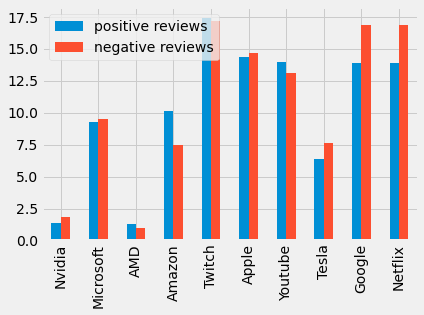

In [ ]:
plotdata = pd.DataFrame({
    "positive reviews":[p_nvidia,p_ms,p_amd,p_amz,p_twitch,p_apple,p_ytube,p_tesla,p_google,p_netflix],
    "negative reviews":[n_nvidia,n_ms,n_amd,n_amz,n_twitch,n_apple,n_ytube,n_tesla,n_google,n_netflix]
    }, 
    index=["Nvidia","Microsoft","AMD","Amazon","Twitch","Apple", "Youtube","Tesla","Google","Netflix"]
)

plotdata.plot(kind="bar")